# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Creating a Simple classifier using keras on MNIST dataset

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [6]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape #60000 images of 28x28

(60000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]

# scale the test set as well
X_test = X_test / 255.


In [11]:
#train=55000
#test=10000
#val=5000

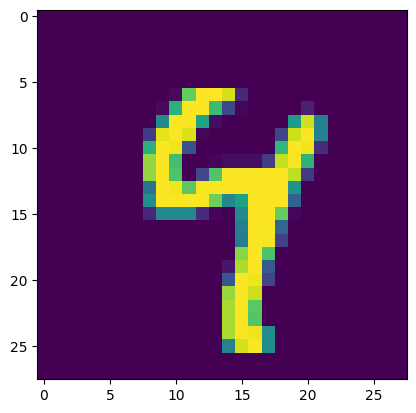

In [13]:
plt.imshow(X_train[2])

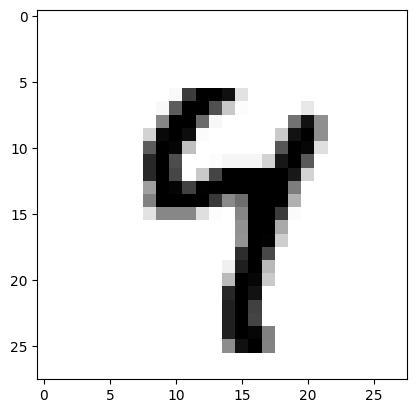

In [14]:
plt.imshow(X_train[2],cmap='binary')


<Axes: >

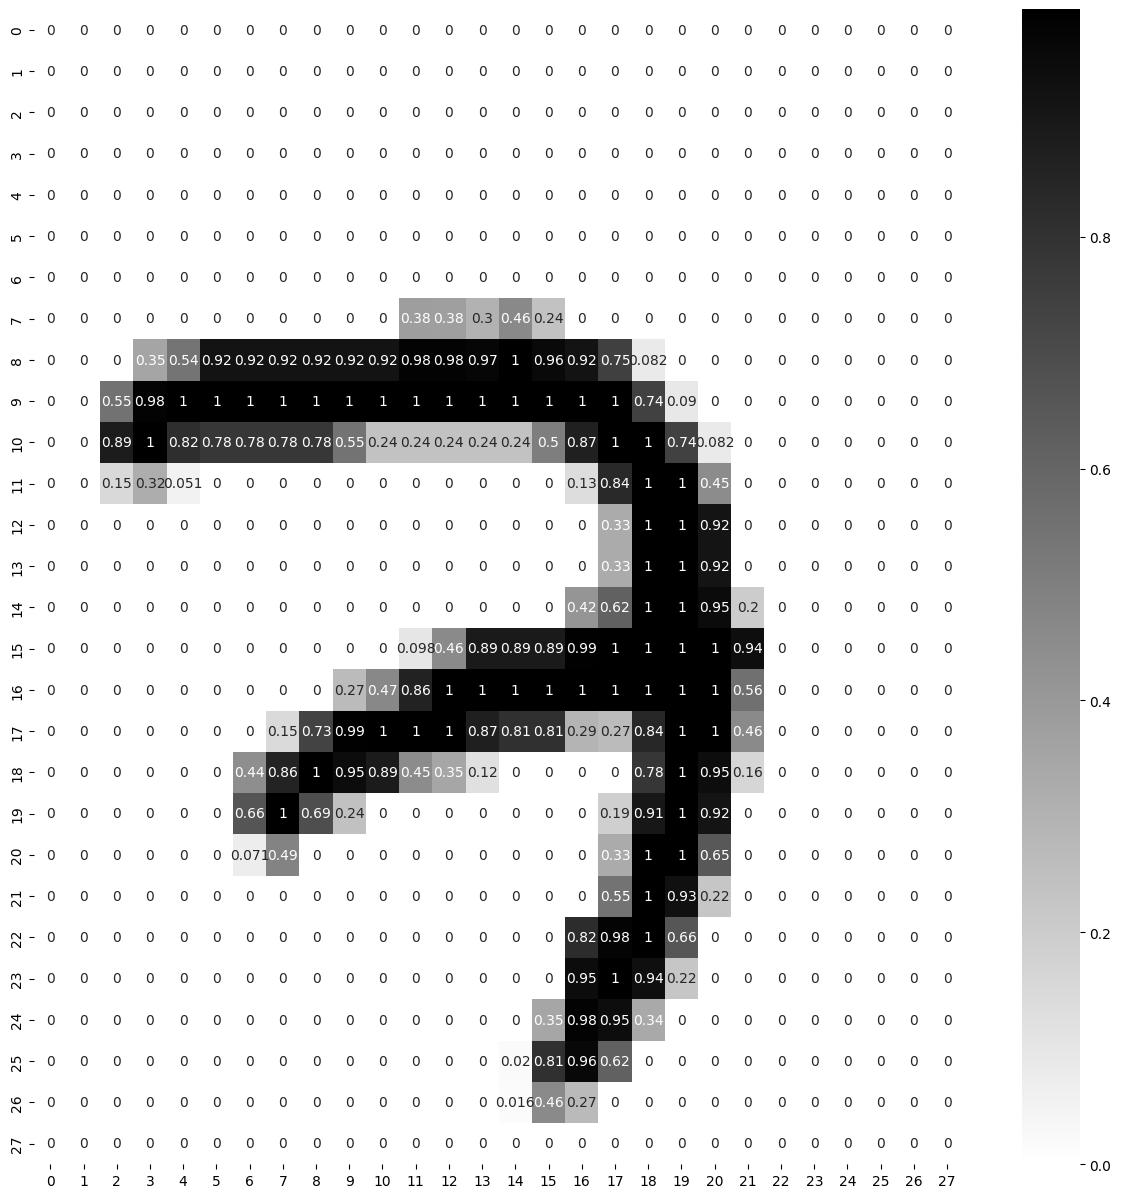

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

# Layers creation of ANN

<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"



In [16]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"), #28x28 =784 NEURONS we flatten it
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"), #784x300
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"), #784x300x100
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")] #784x300x100x10
#oth layer -flatten layer
#1st layer dense layer
model_clf = tf.keras.models.Sequential(LAYERS)  #sequential means simple sequence flow

In [17]:
model_clf.layers

In [18]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
#firstlayer+Second layer+ bias
784*300+300,300*100,100*10+10

(235500, 30000, 1010)

In [22]:
sum((235500,30000,1010))

266510

In [30]:
hidden1=model_clf.layers[1]

In [31]:
hidden1.name

'hiddenLayer1'

In [32]:
hidden1.get_weights()[0].shape

(784, 300)

In [33]:
hidden1.get_weights()[1].shape


(300,)

In [34]:
weights,biases=hidden1.get_weights() #0th index=weight, 1st index=Biases

In [35]:
weights.shape

(784, 300)

In [36]:
weights #randomly initialised firstly

array([[-0.04224256, -0.02276373, -0.04946113, ...,  0.06346241,
        -0.05114879,  0.00591785],
       [ 0.01411609, -0.05151507, -0.04079598, ...,  0.03347133,
         0.04450023, -0.011098  ],
       [ 0.03525079,  0.00760823,  0.03131834, ..., -0.01369721,
        -0.0610709 ,  0.05522974],
       ...,
       [-0.01181359, -0.00990223, -0.04894598, ...,  0.06690954,
        -0.04891869,  0.03406741],
       [ 0.06236538, -0.0551326 ,  0.0522489 , ..., -0.06490978,
        -0.03183808, -0.04671819],
       [-0.01741563,  0.0264471 ,  0.04352639, ...,  0.06401473,
         0.03619619, -0.07135633]], dtype=float32)

In [37]:
biases #randomly initialised firstly

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [38]:
Loss_function="sparse_categorical_crossentropy"
optimizer="SGD"
metrics=["accuracy"]
model_clf.compile(loss=Loss_function, optimizer=optimizer,metrics=metrics) #compiling the model

# Training the model

In [39]:
Epochs=30
validation_set=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=Epochs,validation_data=validation_set,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6033 - accuracy: 0.8404 - val_loss: 0.3091 - val_accuracy: 0.9152
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2872 - accuracy: 0.9171 - val_loss: 0.2356 - val_accuracy: 0.9366
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2348 - accuracy: 0.9326 - val_loss: 0.2063 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2010 - accuracy: 0.9427 - val_loss: 0.1815 - val_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1751 - accuracy: 0.9504 - val_loss: 0.1585 - val_accuracy: 0.9566
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1546 - accuracy: 0.9556 - val_loss: 0.1441 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1383 - accuracy: 0.9612 - val_loss: 0.1331 - val_accuracy:

In [40]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [41]:
#questions can be why did we used 300 neurons in first layer, 100 in second? #it's a hyperparamater
# in last layer 10 because 10 output probabilities

In [43]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.603254,0.840436,0.309072,0.9152
1,0.287213,0.917145,0.235579,0.9366
2,0.234826,0.932636,0.206345,0.9446
3,0.201048,0.942673,0.181453,0.9518
4,0.175132,0.950400,0.158544,0.9566
5,0.154599,0.955582,0.144141,0.9600
6,0.138287,0.961164,0.133064,0.9660
7,0.125176,0.964491,0.124564,0.9684
8,0.113631,0.967945,0.116901,0.9688
9,0.103967,0.971255,0.106468,0.9712


<Axes: >

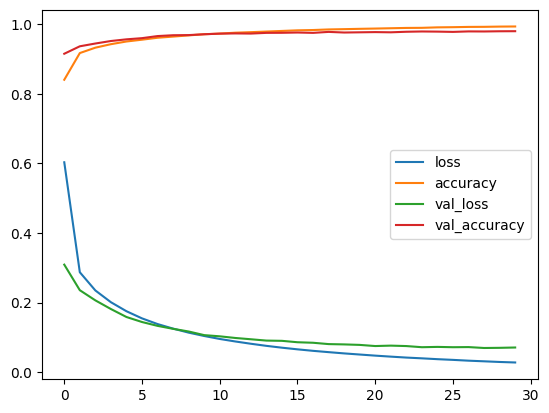

In [44]:
pd.DataFrame(history.history).plot()

# Evaluate model on test set

In [45]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0702 - accuracy: 0.9784


[0.07019013911485672, 0.9783999919891357]

In [46]:
x_new = X_test[:3]

In [47]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [48]:
y_prob = model_clf.predict(x_new) #predict
y_prob.round(3)

1/1 [==============================] - 0s 98ms/step


array([[0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [49]:
y_prob #model gives probabilities for class 0 to 9

array([[1.0809456e-06, 3.9766181e-07, 9.8626049e-05, 1.5347863e-03,
        2.2792291e-08, 3.0958799e-07, 3.9606575e-11, 9.9833846e-01,
        4.9392092e-06, 2.1419333e-05],
       [3.6031071e-07, 2.2615892e-05, 9.9986243e-01, 1.1211252e-04,
        9.1546970e-12, 1.9423785e-08, 7.9717374e-08, 2.9280755e-13,
        2.2633703e-06, 6.3951058e-12],
       [1.0074515e-05, 9.9742091e-01, 6.9903495e-04, 7.4106327e-05,
        1.8534632e-04, 1.5884012e-05, 5.7556808e-05, 1.0165841e-03,
        5.0647074e-04, 1.3913467e-05]], dtype=float32)

In [50]:
y_pred = np.argmax(y_prob, axis = -1)

In [51]:
y_pred

array([7, 2, 1])

In [52]:
actual

array([7, 2, 1], dtype=uint8)

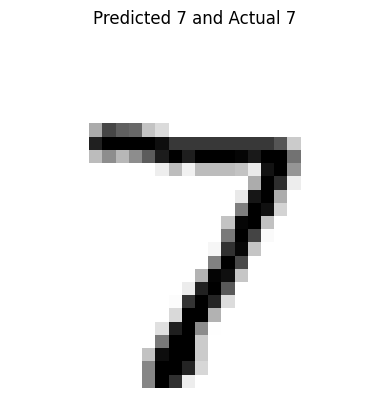

######################


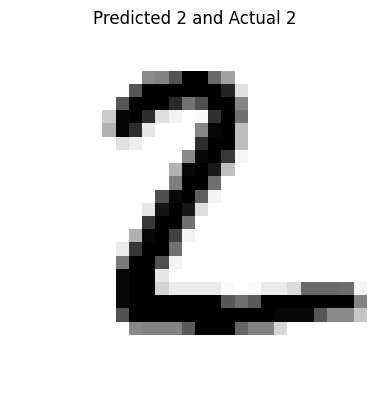

######################


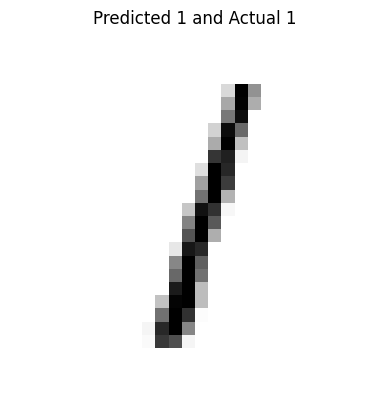

######################


In [53]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")